In [241]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import sqlite3

import seaborn as sb

In [339]:
df = pd.read_csv('/Users/zackmcclernon/DS-SF-34/titanic-train.csv')

In [340]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S,1060
5,328,0,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,C,328
6,729,1,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,C,729
7,552,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,552
8,296,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,S,296
9,1257,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,S,1257


In [341]:
df.isnull().sum()

Unnamed: 0       0
Survived         0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
PassengerId      0
dtype: int64

In [342]:
df2 = df.dropna()

In [343]:
df = df.drop('Ticket', axis = 1)

In [344]:
df2.isnull().sum()

Unnamed: 0     0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
PassengerId    0
dtype: int64

In [345]:
df2.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,647.820917,0.418338,2.216332,29.457856,0.505731,0.434097,35.464971,647.820917
std,379.477562,0.493640,0.840453,14.181381,0.911017,0.825932,54.115270,379.477562
min,1.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,318.250000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,318.250000
50%,640.500000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,640.500000
75%,971.750000,1.000000,3.000000,38.000000,1.000000,1.000000,34.375000,971.750000
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200,1307.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3a77d0>]], dtype=object)

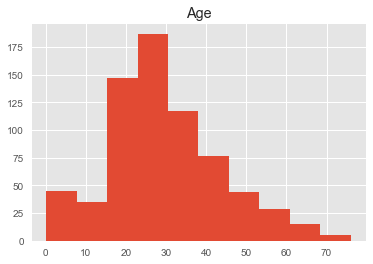

In [346]:
df.hist(column = 'Age')

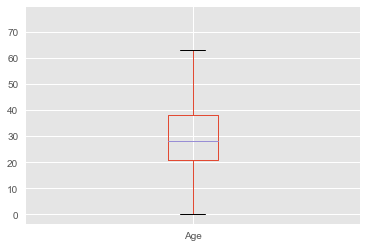

In [347]:
df.boxplot('Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1202b3190>]], dtype=object)

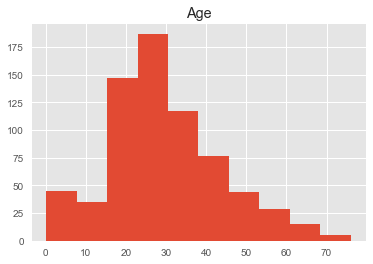

In [348]:
df.hist(column = 'Age')

In [349]:
smf.ols(formula = 'Survived ~ Pclass', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     113.1
Date:                Wed, 24 May 2017   Prob (F-statistic):           6.54e-25
Time:                        21:03:27   Log-Likelihood:                -559.84
No. Observations:                 873   AIC:                             1124.
Df Residuals:                     871   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8479      0.046     18.620      0.000         0.759     0.937
Pclass        -0.1978      0.019    -10.633      0.000        -0.234    -0.161
==============================================================================
Omnibus:                     1908.301   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.328
Skew:                           0.402   Prob(JB):                     2.96e-19
Kurtosis:                       1.696   Cond. No.                         8.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
smf.ols(formula = 'Survived ~ Age', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8562
Date:                Wed, 24 May 2017   Prob (F-statistic):              0.355
Time:                        21:03:27   Log-Likelihood:                -499.12
No. Observations:                 701   AIC:                             1002.
Df Residuals:                     699   BIC:                             1011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4552      0.043     10.595      0.000         0.371     0.540
Age           -0.0012      0.001     -0.925      0.355        -0.004     0.001
==============================================================================
Omnibus:                       12.091   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.002   Jarque-Bera (JB):              116.614
Skew:                           0.326   Prob(JB):                     4.76e-26
Kurtosis:                       1.111   Cond. No.                         75.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [351]:
smf.ols(formula = 'Survived ~ Age * Pclass', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     44.08
Date:                Wed, 24 May 2017   Prob (F-statistic):           4.34e-26
Time:                        21:03:28   Log-Likelihood:                -438.67
No. Observations:                 701   AIC:                             885.3
Df Residuals:                     697   BIC:                             903.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2865      0.132      9.768      0.000         1.028     1.545
Age           -0.0101      0.003     -2.908      0.004        -0.017    -0.003
Pclass        -0.2991      0.052     -5.724      0.000        -0.402    -0.196
Age:Pclass     0.0015      0.001      1.014      0.311        -0.001     0.004
==============================================================================
Omnibus:                      553.852   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.624
Skew:                           0.313   Prob(JB):                     1.38e-12
Kurtosis:                       1.785   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
smf.ols(formula = 'Survived ~ SibSp', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1430
Date:                Wed, 24 May 2017   Prob (F-statistic):              0.705
Time:                        21:03:28   Log-Likelihood:                -613.04
No. Observations:                 873   AIC:                             1230.
Df Residuals:                     871   BIC:                             1240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3961      0.019     21.372      0.000         0.360     0.432
SibSp         -0.0067      0.018     -0.378      0.705        -0.042     0.028
==============================================================================
Omnibus:                       26.101   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.755
Skew:                           0.438   Prob(JB):                     1.36e-32
Kurtosis:                       1.193   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [353]:
smf.ols(formula = 'Survived ~ SibSp', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1430
Date:                Wed, 24 May 2017   Prob (F-statistic):              0.705
Time:                        21:03:28   Log-Likelihood:                -613.04
No. Observations:                 873   AIC:                             1230.
Df Residuals:                     871   BIC:                             1240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3961      0.019     21.372      0.000         0.360     0.432
SibSp         -0.0067      0.018     -0.378      0.705        -0.042     0.028
==============================================================================
Omnibus:                       26.101   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.755
Skew:                           0.438   Prob(JB):                     1.36e-32
Kurtosis:                       1.193   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [354]:
smf.ols(formula = 'Survived ~ Parch', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.24
Date:                Wed, 24 May 2017   Prob (F-statistic):            0.00142
Time:                        21:03:28   Log-Likelihood:                -608.01
No. Observations:                 873   AIC:                             1220.
Df Residuals:                     871   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3684      0.018     20.297      0.000         0.333     0.404
Parch          0.0633      0.020      3.200      0.001         0.024     0.102
==============================================================================
Omnibus:                       24.351   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.145
Skew:                           0.422   Prob(JB):                     1.00e-30
Kurtosis:                       1.244   Cond. No.                         1.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
smf.ols(formula = 'Survived ~ Ticket', data = df).fit().summary()

NameError: name 'Ticket' is not defined

In [ ]:
smf.ols(formula = 'Survived ~ Fare', data = df).fit().summary()

In [ ]:
df.columns

In [ ]:
smf.ols(formula = 'Survived ~ Embarked', data = df).fit().summary()

In [ ]:
smf.ols(formula = 'Survived ~ PassengerId', data = df).fit().summary()

In [ ]:
df['young_man'] = df['sex'] = 'Male' and df['Age'] < 30

In [ ]:
df.young_man

In [ ]:
df[ ['Survived', 'young_man'] ].sum()

In [ ]:
df['old_woman'] = df['Sex'] = 'Female' and df['Age'] > 50

In [ ]:
df[ ['Survived', 'old_woman'] ].sum()

In [ ]:
df['richguy'] = df['sex'] = 'male' and df['Pclass'] < 2

In [ ]:
df.columns

In [356]:
df['is_a_male'] = df['Sex'] is True

In [357]:
df.is_a_male.sum()

0

In [358]:
df.sex

AttributeError: 'DataFrame' object has no attribute 'sex'

In [359]:
df = df.dropna()

In [360]:
X = df[ ['Sex', 'Pclass', 'Age', 'SibSp', 'richguy'] ]
c = df.Survived

model = linear_model.LogisticRegression(penalty = 'l2').\
    fit(X, c)

KeyError: "['richguy'] not in index"

In [361]:
model.score(X, c)

ValueError: X has 5 features per sample; expecting 1

In [362]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Survived'],
    colnames = ['Dead'])

ValueError: X has 5 features per sample; expecting 1

In [363]:
df['richguy']

KeyError: 'richguy'

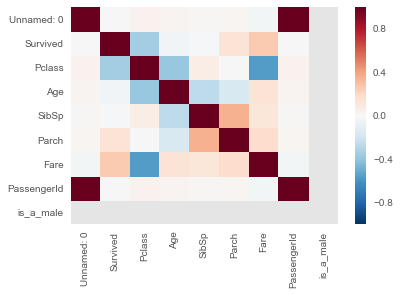

In [364]:
corr = df.corr()
sb.heatmap(corr)

In [365]:
df_3 = df.drop(['Survived', 'Unnamed: 0'], axis = 1)

In [366]:
input = df_3.columns

for column in df_3.columns:
    print column
    X = df[column]
    c = df.Survived

    model = linear_model.LogisticRegression(penalty = 'l2').\
        fit(X, c)

Pclass


/Users/zackmcclernon/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 698]

In [367]:
df_3.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
PassengerId    0
is_a_male      0
dtype: int64

In [368]:
X = df['Age']
c = df.Survived

model = linear_model.LogisticRegression(penalty = 'l2').\
    fit(X, c)

/Users/zackmcclernon/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 698]

In [369]:
X = df[['Sex']]
c = df.Survived

model = linear_model.LogisticRegression(penalty = 'l2').\
    fit(X, c)

ValueError: could not convert string to float: male

In [370]:
model.score(X, c)

ValueError: could not convert string to float: male

In [371]:
X = df[['Pclass']]
c = df.Survived

model = linear_model.LogisticRegression(penalty = 'l2').\
    fit(X, c)

In [372]:
model.score(X,c)

0.67191977077363896

In [217]:
model.score(X, c)

0.66332378223495703

In [224]:
df['man_lowerclass'] = df['Sex'] = True and df['Pclass'] > 1

/Users/zackmcclernon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [223]:
df.sex

0       True
1      False
2       True
3      False
4      False
5      False
6      False
7      False
8      False
9      False
       ...  
862    False
863     True
865    False
866    False
867    False
868    False
869     True
870     True
871    False
872    False
Name: sex, dtype: bool

In [301]:
X = df[['old']]
c = df.Survived

model = linear_model.LogisticRegression(penalty = 'l2').\
    fit(X, c)

In [302]:
model.score(X, c)

0.58166189111747846

In [303]:
for value in df.Pclass:
    value = float(value)

In [307]:
df_test = pd.read_csv('/Users/zackmcclernon/Downloads/titanic-test.csv')